# Introduction
# Providing Travel Recommendations Using Machine Learning
# Goal:
## My project aims to develop a machine learning-based solution that provides personalized recommendations for travelers based on their preferences and past travel history
# Data Overview
My data is sourced directly from Yelp. The files were originally in JSON format and were converted to CSV prior to this exploration. 
In this notebook, I'll be exploring three different files business, user, and review data. 

#### Packages Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Business Data Set
#### Data Dictionary
- **business_id**  	Unique identifier for the business  	**string**
- **name**	        Name of the business	                **string**
- **address**	Address where the business is located	**string**
- **city**	City where the business is located	**string**
- **state**	State where the business is located	**string**
- **postal_code**	postal_code where the business is located	**string**
- **latitude**	Geographical latitude of the business	**float64**
- **longitude**	Geographical longitude of the business	**float64**
- **stars**	Star rating of the business	**float64**
- **review_count**	Number of reviews the business has received	**int64**
- **is_open**	0 is closed and 1 is open	**int64**
- **attributes**	Attribute: Boolean	**string-Dict**
- **categories**	Categories the business falls under	**string**
- **hours**	Day of the week: Hours of operation	**string-Dict**

In [3]:
# Reading CSV file into notebook and saving it to pandas df
df_b = pd.read_csv('data/yelp_business.csv', index_col=0)

In [4]:
# Quick peak into data 
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [6]:
# Quick check to count the number of null values per column
df_b.isna().sum()

business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [18]:
# Check for duplicate rows 
df_b[df_b.duplicated()].sum()

business_id     0.0
name            0.0
address         0.0
city            0.0
state           0.0
postal_code     0.0
latitude        0.0
longitude       0.0
stars           0.0
review_count    0.0
is_open         0.0
attributes      0.0
categories      0.0
hours           0.0
dtype: float64

## Business Details
The first eight columns contain information about the business, such as a business id, name of the business, address, city, state, postal code, and geo-location coordinates.

**Address**

In [20]:
df_b['address'].isna().sum()
# null values will need to be address later 

5127

**City**

In [7]:
df_b['city'].value_counts()

Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: city, Length: 1416, dtype: int64

Interestingly, there seems to be significantly more cities represented in the dataset than initially expected. I will have to do a deeper investigation as the majority could represent suburbs surrounding major metropolitan areas.

In [39]:
# Save value counts of city column to new data frame
vc_city = df_b['city'].value_counts()

In [37]:
# returns cities with more than 1500 business entries
print(vc_city[vc_city > 1500])

Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Name: city, dtype: int64


**State**

In [40]:
df_b['state'].value_counts()

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

Data represent various states across the US and Canada

**Postal Code**

In [21]:
df_b['postal_code'].isna().sum()
# null values will need to be addressed later 

73

In [36]:
df_b['postal_code'].value_counts()

93101      1866
89502      1804
70130      1512
19103      1362
19107      1353
           ... 
46211         1
T5K 1C4       1
T6G 0W8       1
T5H 0R8       1
T5J 4X6       1
Name: postal_code, Length: 3361, dtype: int64

An interesting thing to note is that Canadian postal codes have a noticablly format; the incorporation of nonnumeric values may be another layer of difficulty when performing an analysis. 

## Stars 
Column contains the average of all user ratings for a business.

In [43]:
df_b['stars'].value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

In [46]:
df_b['stars'].agg('average')

3.5967235576603303

Star ratings are given in increments of .5 with 4.0 the most common rating given to businesses and 3.6 the being the average rating. 

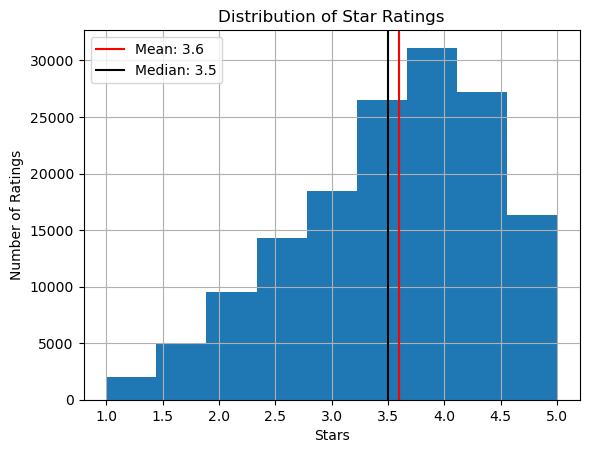

In [63]:
# Histogram distribution for review ratings
mean = round(df_b['stars'].mean(),2)
median = df_b['stars'].median()

df_b['stars'].hist(bins=9) 
plt.xlabel('Stars')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Star Ratings')

plt.axvline(mean, color='red', label=f'Mean: {mean}')
plt.axvline(median, color='black', label=f'Median: {median}')
plt.legend()

# Save as PNG
#plt.savefig('figures/BusinessRatingsDistribution.png')

plt.show()

Plot visualizes a slightly right-skewed distribution. Users tend to give higher ratings. 

## Review Count 
The column contains a count of the number of user reviews for each business.

<Axes: xlabel='review_count'>

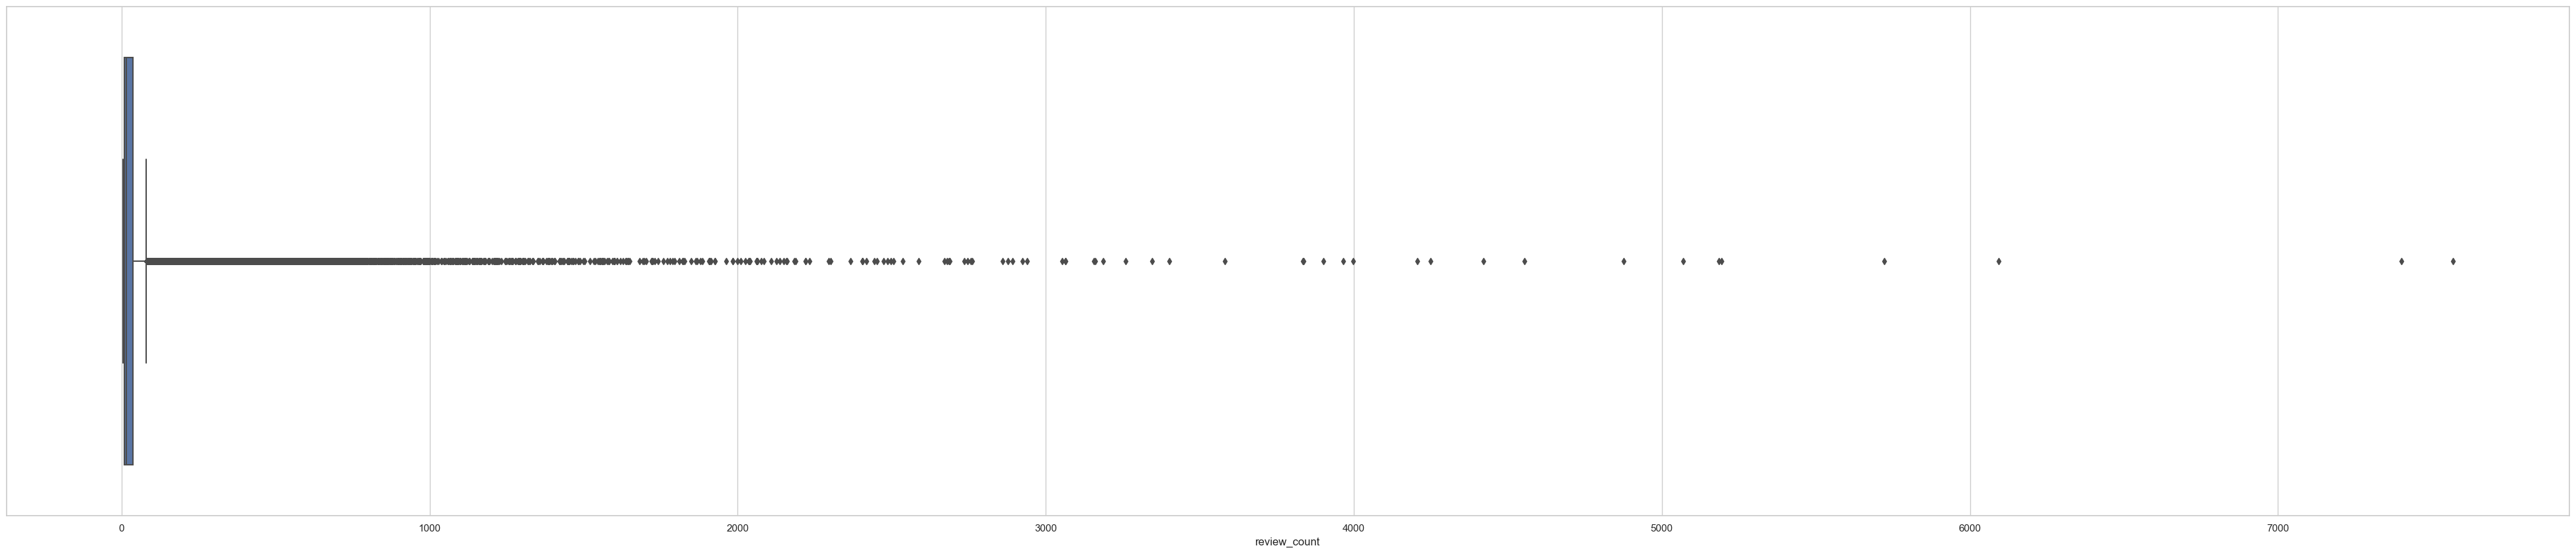

In [86]:
# Boxplot of review count
# Resource: https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/
# Create a figure with a specific size
plt.figure(figsize=(50, 10))
# use to set style of background of plot
sns.set(style="whitegrid")
 
sns.boxplot(x =df_b['review_count'])

In [83]:
round(df_b['review_count'].mean(),2)

44.87

In [85]:
df_b['review_count'].median()

15.0

The plot wasn't the best visual, but it did highlight the enormous range in the number of reviews a business receives. You can also get a sense of spread from the median and mean, the latter being significantly higher at 45 average reviews per business. 

## Is Open
The binary column indicates where a business is still open and operating or permanently closed.

In [36]:
# Count of open and closed businesses
df_b['is_open'].value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

In [37]:
is_open_vc = df_b['is_open'].value_counts()

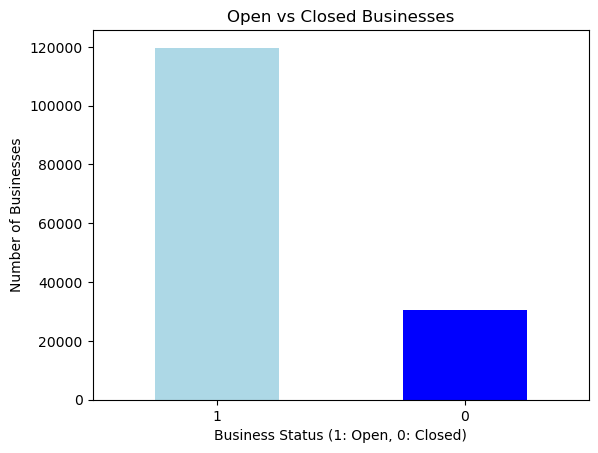

In [64]:
is_open_vc.plot(kind='bar', color=['lightblue', 'blue'])

plt.title('Open vs Closed Businesses')
plt.xlabel('Business Status (1: Open, 0: Closed)')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=0)

# Save as PNG
#plt.savefig('figures/OpenVsClosedBusinesses.png')

plt.show()

30,648 businesses are closed which accounts for 20% of the data. On the surface, you probably wouldn't want 'out-of-date' data; however, for my project, it could still be helpful to make connections between users and businesses that they visited, regardless of whether they are still open. 

## Attributes
The column contains a dictionary containing a set of attributes that are different for each business category and the boolean value represents whether the business offers that attribute or not.

In [ ]:
# May drop, it may be too computationally expensive to flatten 

## Categories
[Yelp Categories](https://blog.yelp.com/businesses/yelp_category_list/)<br/>
The column contains a list of categories the business falls under; for more info, click the link above, where Yelp provides a breakdown of their category organization. 

In [31]:
# Check for null values
df_b['categories'].isna().sum()

29

I'll go ahead and drop these rows from the data frame. Filtering businesses is essential for modeling, these empty values won't help. 

In [32]:
# dropping rows with empty category data
df_b.dropna(subset=['categories'], inplace=True)

In [33]:
df_b['categories'].isna().sum()

0

In [41]:
# Need to flatten or explode subcategories into there own column 

In [ ]:
# Need to drop categories not relevant for travel

In [5]:
# initialize list using counts of each main category
category_counts = [['Restaurants', df_b['categories'].str.contains("Restaurants").fillna(False).sum()], 
        ['Food', df_b['categories'].str.contains(", Food,").fillna(False).sum()], 
        ['Active Life', df_b['categories'].str.contains("Active Life").fillna(False).sum()],
        ['Arts & Entertainment', df_b['categories'].str.contains("Arts & Entertainment").fillna(False).sum()],
        ['Hotels & Travel', df_b['categories'].str.contains("Hotels & Travel").fillna(False).sum()],
        ['Nightlife', df_b['categories'].str.contains("Nightlife").fillna(False).sum()]]
 
# Create the pandas DataFrame
df_categories = pd.DataFrame(category_counts, columns=['Category', 'Count'])

# Sort Values
df_categories = df_categories.sort_values('Count', ascending=False)
# print dataframe.
print(df_categories)

               Category  Count
0           Restaurants  52268
1                  Food  14533
5             Nightlife  12281
2           Active Life   7687
4       Hotels & Travel   5857
3  Arts & Entertainment   5434


In [67]:
# Get a total count of all travel related businesses
df_categories['Count'].sum()

98060

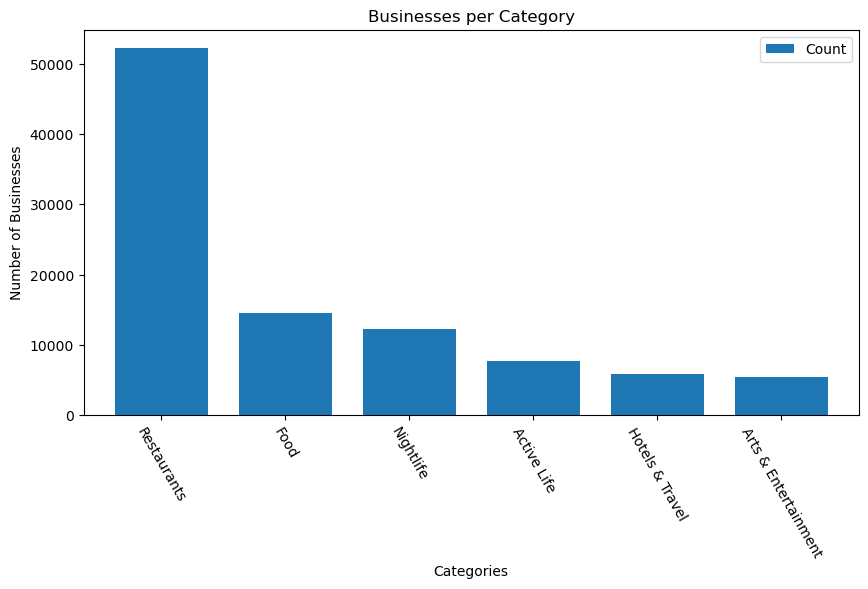

In [75]:
df_categories.plot('Category', 'Count', kind='bar', width=.75, figsize=(10,5))

# Rotating X-axis labels
plt.xticks(rotation = -60)
 
# Setting title and axis labels
plt.title('Businesses per Category')
plt.xlabel("Categories")
plt.ylabel("Number of Businesses")

# Save bar chart to file
plt.savefig('figures/BusinessMainCategoriesChart.png', bbox_inches='tight')
 
# Show plot
plt.show()

These six categories represent the businesses you typically would visit when traveling. <br>
Restaurants are by far the most represented business category, this category is further broken down by the type of cuisine served. The food category is a catch-all category for any food-related business that isn't a restaurant—places like bakeries, coffee shops, pastry shops, food trucks, etc. The nightlife category contains businesses such as bars, comedy clubs, dance clubs, etc. Active life includes Amusement parks, experiences, parks, zoos, etc. The hotels & travel category can include hotels, hostels, tours, vacation rentals, etc. Lastly, the least represented group can include places such as cultural centers, festivals, museums, etc. In total, I have almost 100,000 businesses I can use for the model. 

## Hours
The column contains a dictionary of business hours by day of the week.

# User Data Set
#### Data Dictionary
- **user_id**  	Unique identifier for each user  	**string**
- **name**	        Name of user	                **string**
- **review_count**	Number of reviews by user	**int64**
- **yelping_since**	Date account opened	**Datetime**
- **useful**	Count of how many other users found current user reviews useful	**int64**
- **funny**	Count of how many other users found current user reviews funny	**int64**
- **cool**	Count of how many other users found current user reviews cool	**int64**
- **elite**	years user was labeled as elite reviewer	**string**
- **friends**	list of friends user ids	**string**
- **fans**	number of other users considered fans	**int64**
- **average_stars**	average number of stars given to businesses	**float64**
- **compliment_hot**	compliments received labeled as hot	**int64**
- **compliment_more**	compliments received labeled as more	**int64**
- **compliment_profile**	compliments received labeled as profile	**int64**
- **compliment_cute**	compliments received labeled as cute	**int64**
- **compliment_list**	compliments received labeled as list	**int64**
- **compliment_note**	compliments received labeled as note	**int64**
- **compliment_plain**	compliments received labeled as plain	**int64**
- **compliment_cool**	compliments received labeled as cool	**int64**
- **compliment_funny**	compliments received labeled as funny	**int64**
- **compliment_writer**	compliments received labeled as writer	**int64**
- **compliment_photos**	compliments received labeled as photos	**int64**

In [3]:
# Reading CSV file into notebook and saving it to pandas df
df_u = pd.read_csv('data/yelp_user.csv', index_col=0)

In [33]:
# Quick peak into data 
df_u.head()

NameError: name 'df_u' is not defined

In [4]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987897 entries, 0 to 1987896
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   fans                int64  
 9   average_stars       float64
 10  compliment_hot      int64  
 11  compliment_more     int64  
 12  compliment_profile  int64  
 13  compliment_cute     int64  
 14  compliment_list     int64  
 15  compliment_note     int64  
 16  compliment_plain    int64  
 17  compliment_cool     int64  
 18  compliment_funny    int64  
 19  compliment_writer   int64  
 20  compliment_photos   int64  
dtypes: float64(1), int64(16), object(4)
memory usage: 333.7+ MB


In [153]:
# Quick check to count the number of null values per column
df_u.isna().sum()

user_id                     0
name                        8
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
elite                 1896699
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos           0
dtype: int64

In [164]:
# Check for duplicate rows 
df_u[df_u.duplicated()].sum()

user_id               0.0
name                  0.0
review_count          0.0
yelping_since         0.0
useful                0.0
funny                 0.0
cool                  0.0
elite                 0.0
fans                  0.0
average_stars         0.0
compliment_hot        0.0
compliment_more       0.0
compliment_profile    0.0
compliment_cute       0.0
compliment_list       0.0
compliment_note       0.0
compliment_plain      0.0
compliment_cool       0.0
compliment_funny      0.0
compliment_writer     0.0
compliment_photos     0.0
dtype: float64

## Users
First column is a unique identifier assigned by Yelp for each user. Second column provides the users first name.

In [12]:
df_u['name'].isna().sum()
# May need to drop 8 rows that are missing user names

8

In [13]:
df_u[df_u['name'].isna()]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
346342,jL7vRW4ipQV1ys1g-AZSng,NaN,8,2011-05-04 23:46:26,3,1,1,NaN,0,4.38,...,0,0,0,0,0,0,0,0,0,0
888148,znZjQUJC8RbUYSsDz8uKzQ,NaN,4,2013-06-13 10:36:31,1,0,0,NaN,0,3.25,...,0,0,0,0,0,0,0,0,0,0
1251800,rkgt2TDkIYnk_QpDpSoXnA,NaN,5,2013-07-28 17:10:40,9,7,1,NaN,0,1.83,...,0,0,0,0,1,1,0,0,0,0
1516282,mvDQ8dj2nZyfELVgsj9Y8g,NaN,1,2012-09-17 15:11:23,0,0,0,NaN,0,5.00,...,0,0,0,0,0,0,0,0,0,0
1568939,ny_zgxiINq-G4ek0atyeVQ,NaN,4,2011-09-09 06:18:50,7,1,1,NaN,0,3.50,...,0,0,0,0,0,0,0,0,0,0
1580519,xtXs7f8kFEjdZJ7CF5gtDA,NaN,1,2012-08-11 06:46:51,5,1,0,NaN,0,1.00,...,0,0,0,0,0,1,0,0,0,0
1722449,YQ3GIzXYGw0E7SqWxhRLKA,NaN,3,2016-06-28 13:08:03,1,0,0,NaN,0,3.67,...,0,0,0,0,0,0,0,0,0,0
1968196,oL-7HEGiaffWfCeB0Kwj0g,NaN,1,2011-10-25 17:47:58,1,0,0,NaN,0,5.00,...,0,0,0,0,0,0,0,0,0,0


Dropping these eight rows shouldn't impact analysis

## Review Count
Column contains a count of how many reviews a user has provided.

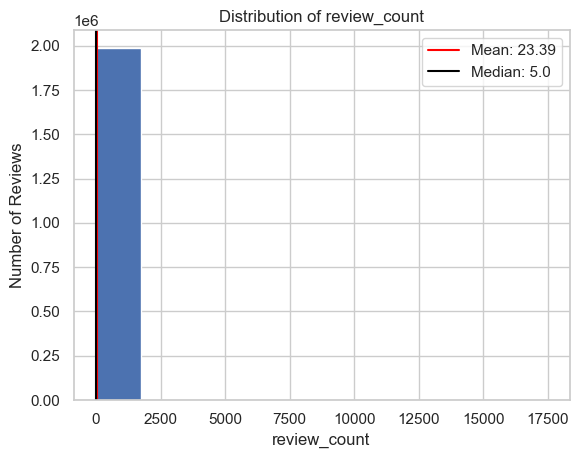

In [19]:
# Histogram distribution for review counts for all users
mean = round(df_u['review_count'].mean(),2)
median = df_u['review_count'].median()

df_u['review_count'].hist() 
plt.xlabel('review_count')
plt.ylabel('Number of Reviews')
plt.title('Distribution of review_count')

plt.axvline(mean, color='red', label=f'Mean: {mean}')
plt.axvline(median, color='black', label=f'Median: {median}')
plt.legend()

plt.show()

<Axes: xlabel='review_count'>

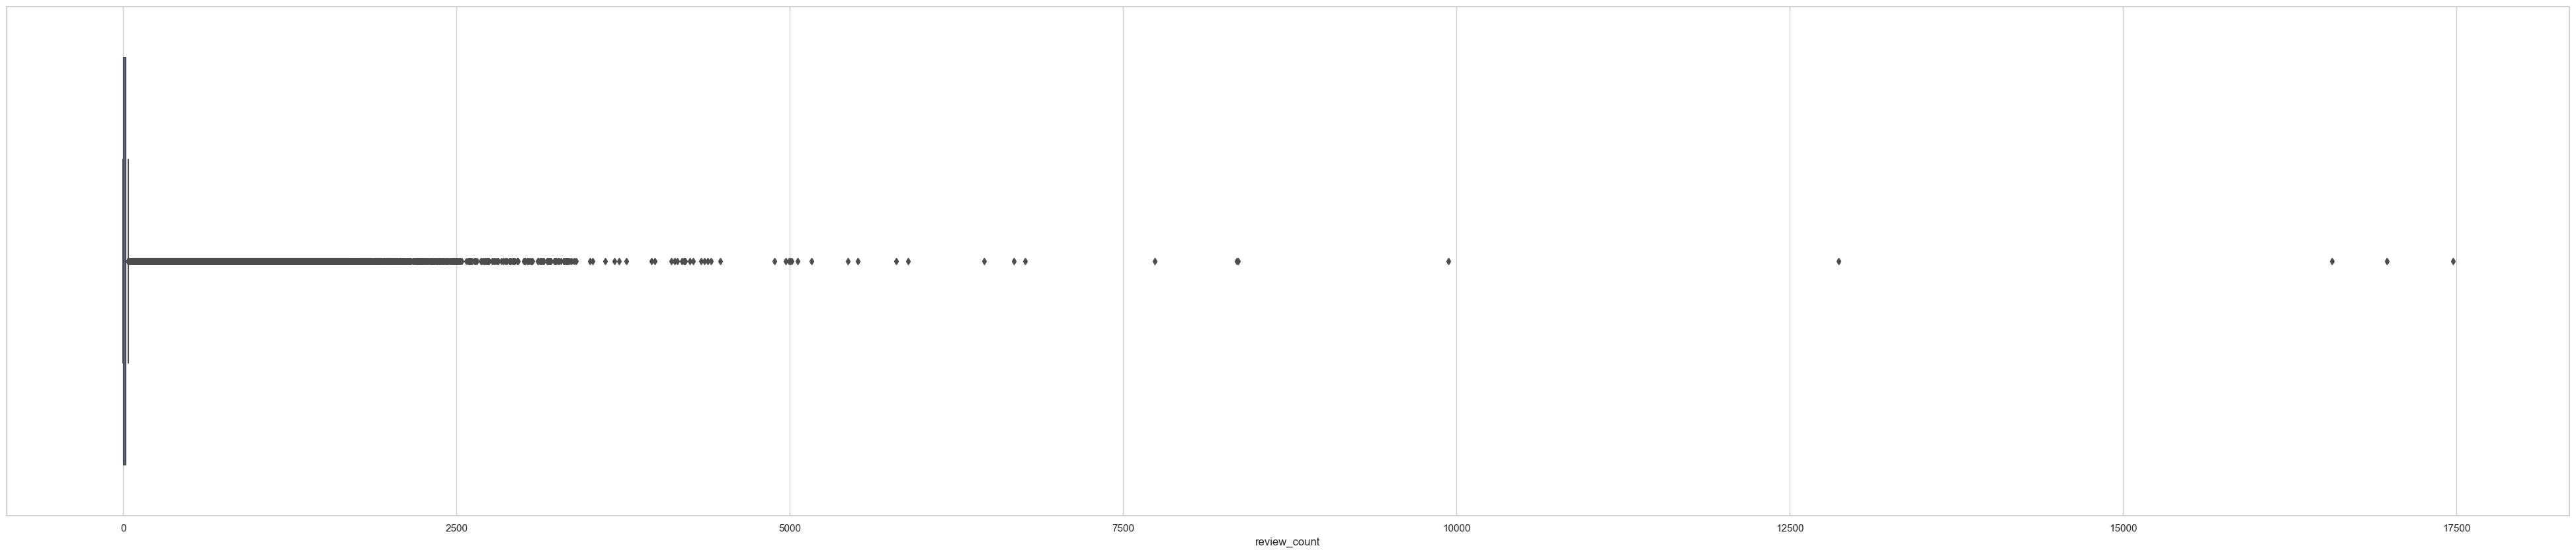

In [16]:
# Create a figure with a specific size
plt.figure(figsize=(50, 10))
# use to set style of background of plot
sns.set(style="whitegrid")
 
sns.boxplot(x =df_u['review_count'])

In [20]:
print(mean)
print(median)

23.39
5.0


Similar to the amount of reviews businesses receive, in this data set you can clearly see some power users who are very prolific reviewers, but the vast majority of the amount of user reviews lie somewhere in between the median and the mean

## Yelping Since
Column contains the date the user created their Yelp account.

In [ ]:
# Possibly unrelated to my goal but could preform a time series of register user on the site and spot any trends

In [17]:
# Convert to date time
df_u['yelping_since'] = pd.to_datetime(df_u['yelping_since'])

In [18]:
# Verify changes
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987897 entries, 0 to 1987896
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   user_id             object        
 1   name                object        
 2   review_count        int64         
 3   yelping_since       datetime64[ns]
 4   useful              int64         
 5   funny               int64         
 6   cool                int64         
 7   elite               object        
 8   fans                int64         
 9   average_stars       float64       
 10  compliment_hot      int64         
 11  compliment_more     int64         
 12  compliment_profile  int64         
 13  compliment_cute     int64         
 14  compliment_list     int64         
 15  compliment_note     int64         
 16  compliment_plain    int64         
 17  compliment_cool     int64         
 18  compliment_funny    int64         
 19  compliment_writer   int64         
 20  co

## Review Feedback
Columns useful, funny, and cool all provide a count of feedback received from other users regarding their written reviews.

In [ ]:
# Visualize responses to user reviews 

In [26]:
feeback_sum = df_u[['useful','funny','cool']].sum()

In [27]:
feeback_sum

useful    84080758
funny     33735678
cool      47297862
dtype: int64

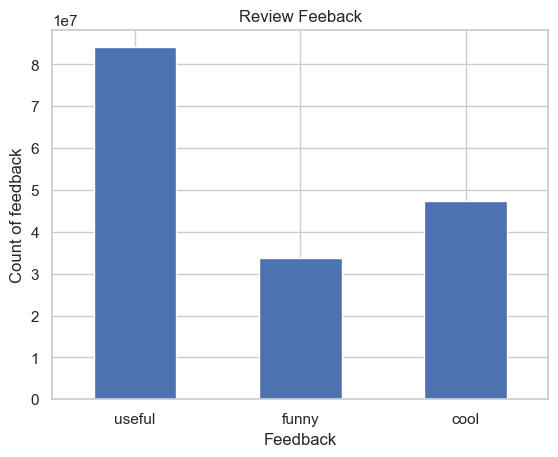

In [33]:
feeback_sum.plot.bar()

# Rotating X-axis labels
plt.xticks(rotation = 0)
 
# Setting title and axis labels
plt.title('Review Feeback')
plt.xlabel("Feedback")
plt.ylabel("Count of feedback")
 
# Show plot
plt.show()

## Elite 
List of years a user was considered an 'elite' reviewer

In [ ]:
# May drop this column not sure is this will add value 

## Friends - Dropped
The column contains a list of other user IDs who have connected as friends within the Yelp platform.
The column was deleted before import to reduce the size of the data for computational efficiency. 

## Fans
Column contains a count of how many fans each user has. 

In [ ]:
# Histogram of distribution of fans

## Average Stars
Column contains average of all user ratings for businesses  

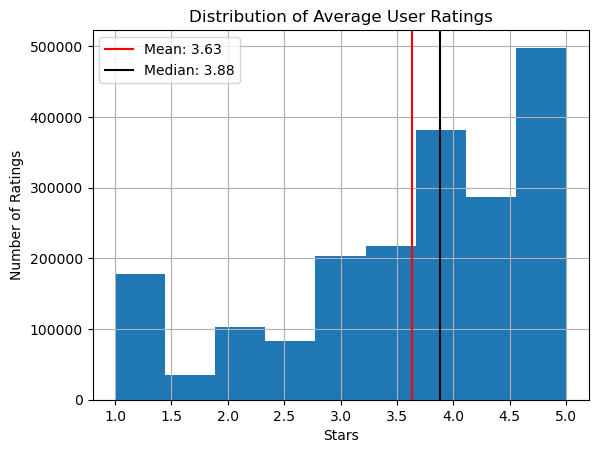

In [69]:
# Histogram distribution for review ratings
mean = round(df_u['average_stars'].mean(),2)
median = df_u['average_stars'].median()

df_u['average_stars'].hist(bins=9) 
plt.xlabel('Stars')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Average User Ratings')

plt.axvline(mean, color='red', label=f'Mean: {mean}')
plt.axvline(median, color='black', label=f'Median: {median}')
plt.legend()

# Save distribution to file
#plt.savefig('figures/AverageUserRatingDistribution.png')

plt.show()

Similar to the business ratings, this has a right skew to it. Users tend to give 4+ star reviews. However, a large portion of the users like to express their displeasure, as there are about 18000 users with an average review score of 1.

## Compliments 
The last 11 columns contain counts for various compliments that other users can send each other. 

In [18]:
# Visualize the amount of compliments users receive
compliments_sum = df_u.iloc[:,10:].sum()

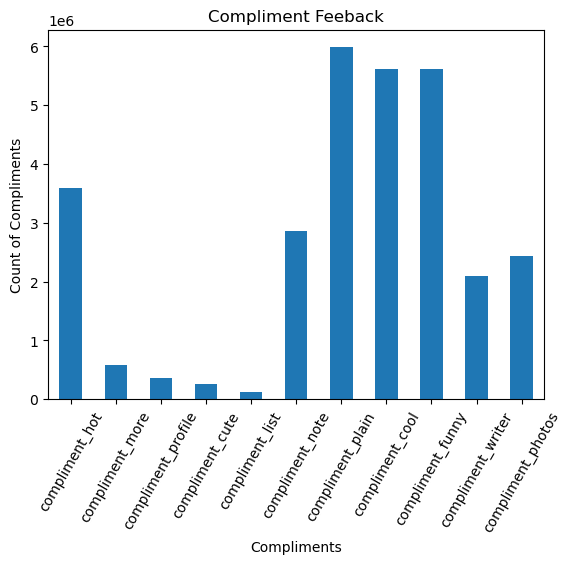

In [23]:
compliments_sum.plot.bar()

# Rotating X-axis labels
plt.xticks(rotation = 60)
 
# Setting title and axis labels
plt.title('Compliment Feeback')
plt.xlabel("Compliments")
plt.ylabel("Count of Compliments")
 
# Show plot
plt.show()

# Review Data Set
#### Data Dictionary
- **review_id**  	Unique identifier for each review  	**string**
- **user_id**  	Unique identifier for each user  	**string**
- **business_id**  	Unique identifier for businesses  	**string**
- **stars**	rating given to the business between 1 and 5	**float64**
- **useful**	count of users who found the review useful	**string**
- **funny**	count of users who found the review funny	**string**
- **cool**	count of users who found the review cool	**int64**
- **text**	text of the review	**int64**
- **date**	date the user submitted the review	**datetime**

In [55]:
%%time
# Reading CSV file into notebook and saving it to pandas df
df_r = pd.read_csv('data/yelp_review.csv', index_col=0)

CPU times: user 6.22 s, sys: 882 ms, total: 7.1 s
Wall time: 7.42 s


In [56]:
# Shape of data frame
df_r.shape

(6990280, 8)

In [119]:
# Quick peak into data 
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,2017-01-14 20:54:15


In [120]:
# Gives me a a quick look at the data types for each column, number of entries, and columns.
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   date         object 
dtypes: float64(1), int64(3), object(4)
memory usage: 480.0+ MB


In [161]:
# Quick check to count the number of null values per column
df_r.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
date           0
dtype: int64

In [163]:
# Check for duplicate rows 
df_r[df_r.duplicated()].sum()

review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
date           0.0
dtype: float64

The data set needs minimal cleaning; there is definitely a lot of value to be discovered as I explore relationships between users, businesses, and their ratings. 

## Unique Identifiers
The first column contains a unique identifier for each review. The second and Third column are foreign keys to link with the business and user data tables.  

## Stars
Column contains the rating between 1 and 5 given to the specificfied business. 

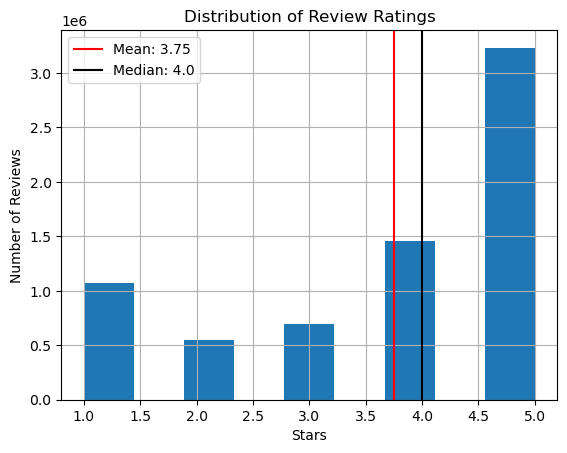

In [30]:
# Create a distribution plot for stars 
# Histogram distribution for star ratings
mean = round(df_r['stars'].mean(),2)
median = df_r['stars'].median()

df_r['stars'].hist(bins=9) 
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Ratings')

plt.axvline(mean, color='red', label=f'Mean: {mean}')
plt.axvline(median, color='black', label=f'Median: {median}')
plt.legend()

plt.show()

## Review Feedback
Columns useful, funny, and cool all provide a count of feedback received from other users regarding their written review.

In [ ]:
# May be unrelated to my goal but I could find correlations between feedback and stars given to a business 

In [31]:
feeback_sum = df_r[['useful','funny','cool']].sum()

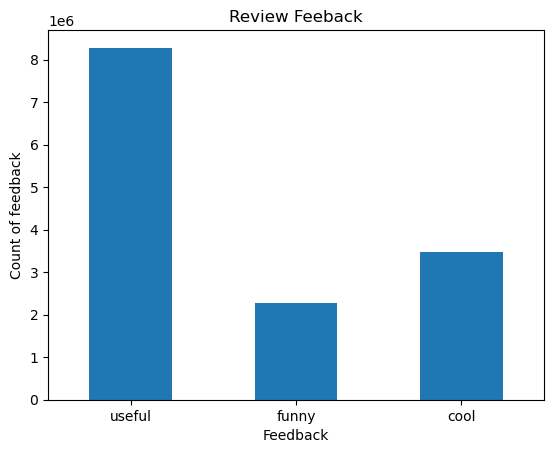

In [32]:
feeback_sum.plot.bar()

# Rotating X-axis labels
plt.xticks(rotation = 0)
 
# Setting title and axis labels
plt.title('Review Feeback')
plt.xlabel("Feedback")
plt.ylabel("Count of feedback")
 
# Show plot
plt.show()

## Text - Dropped
The column contains the user's written review.
The column was deleted before import to reduce the size of the data for computational efficiency. 
I may do a separate NLP analysis in the future to gain potential insights. 

## Date
Column contains a date-time object for the date the review was submitted. 

In [ ]:
# Time series analysis?

In [5]:
# Convert to date time
df_r['date'] = pd.to_datetime(df_r['date'])

In [6]:
# Verify Changes
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        float64       
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 480.0+ MB


In [51]:
# Save total reviews per year to new df
reviews_grouped_year = df_r.groupby(df_r.date.dt.year)['review_id'].count()

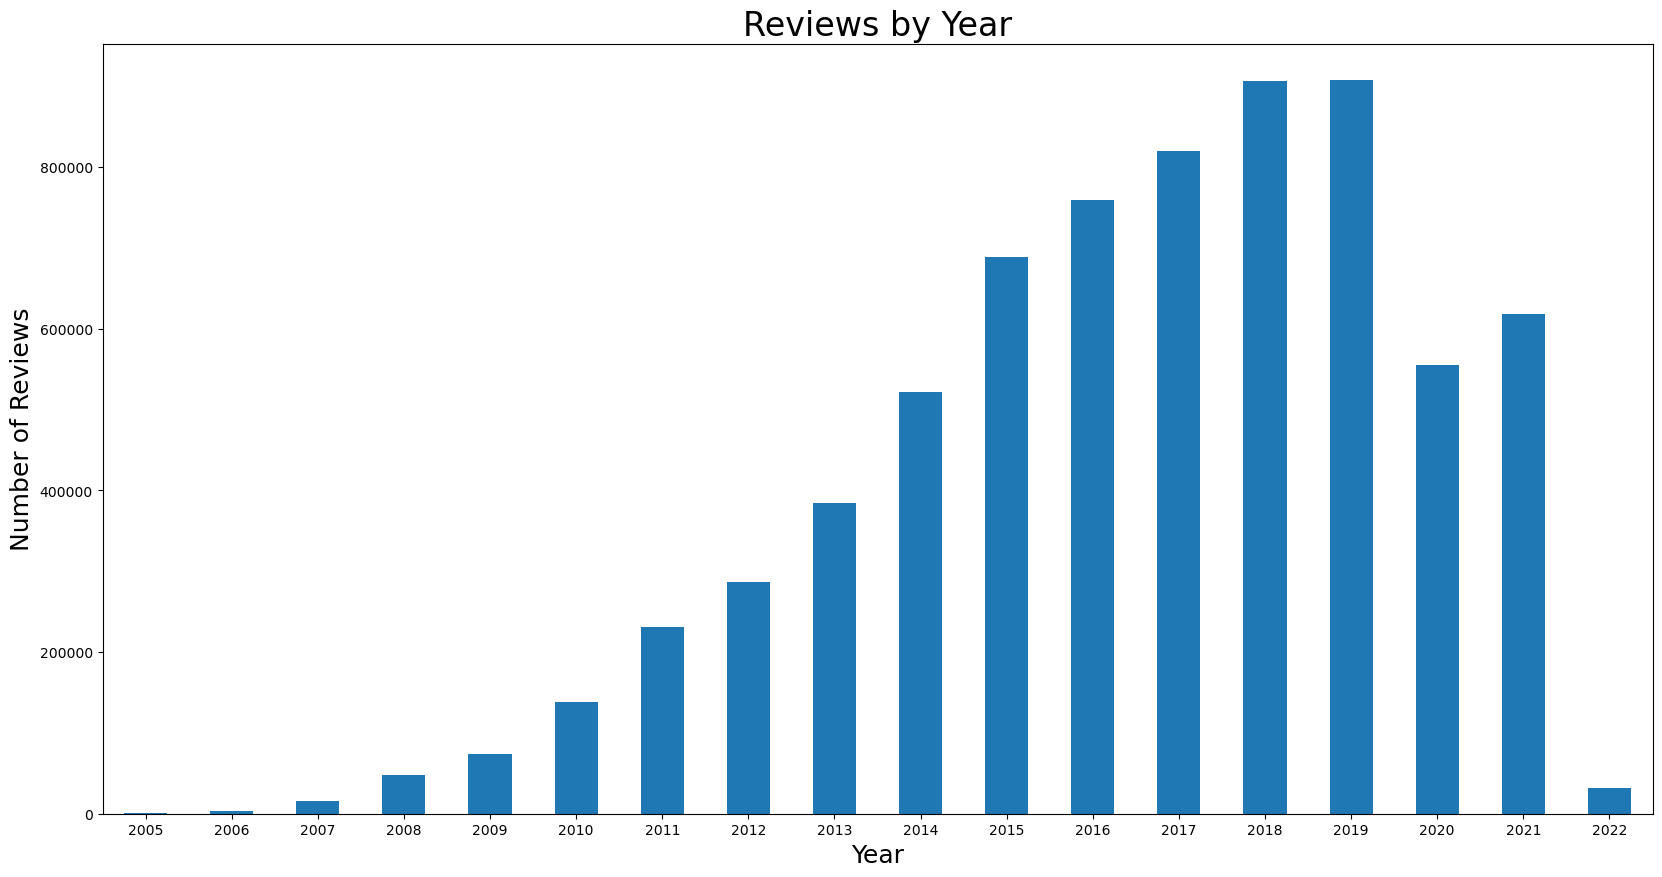

In [70]:
reviews_grouped_year.plot.bar(figsize=(20,10))

# Rotating X-axis labels
plt.xticks(rotation = 0)
 
# Setting title and axis labels
plt.title('Reviews by Year', size=24)
plt.xlabel("Year", size=18)
plt.ylabel("Number of Reviews", size=18)

# Save distribution to file
#plt.savefig('figures/ReviewsByYear.png')
 
# Show plot
plt.show()

# Data Wrangling 

Now that I've explored my data sets I need to do a little data wrangling before I can model user recommondations. Our model will need a ratings table with three features for each business rating: User Ids, Business Ids, and the rating given.

In [15]:
# Additional packages needed for data wrangling
from itertools import chain
from collections import Counter

## Data Reduction
To improve computational speeds for modeling I'll be making some reductions in our original data set. 

### Cities
Inlcuding the top 6 cities from our data set 

In [95]:
df_b['city'].value_counts().head(6)

Philadelphia    14560
Tucson           9244
Tampa            9042
Indianapolis     7537
Nashville        6969
New Orleans      6208
Name: city, dtype: int64

In [98]:
# List of cities to include
cities_to_include = ["Philadelphia", "Tucson", "Tampa", "Indianapolis", "Nashville", "New Orleans"]

# Filter the DataFrame to only include rows with cities in the cities_to_include list
filtered_df_b = df_b[df_b['city'].isin(cities_to_include)]

In [99]:
filtered_df_b['city'].value_counts()

Philadelphia    14560
Tucson           9244
Tampa            9042
Indianapolis     7537
Nashville        6969
New Orleans      6208
Name: city, dtype: int64

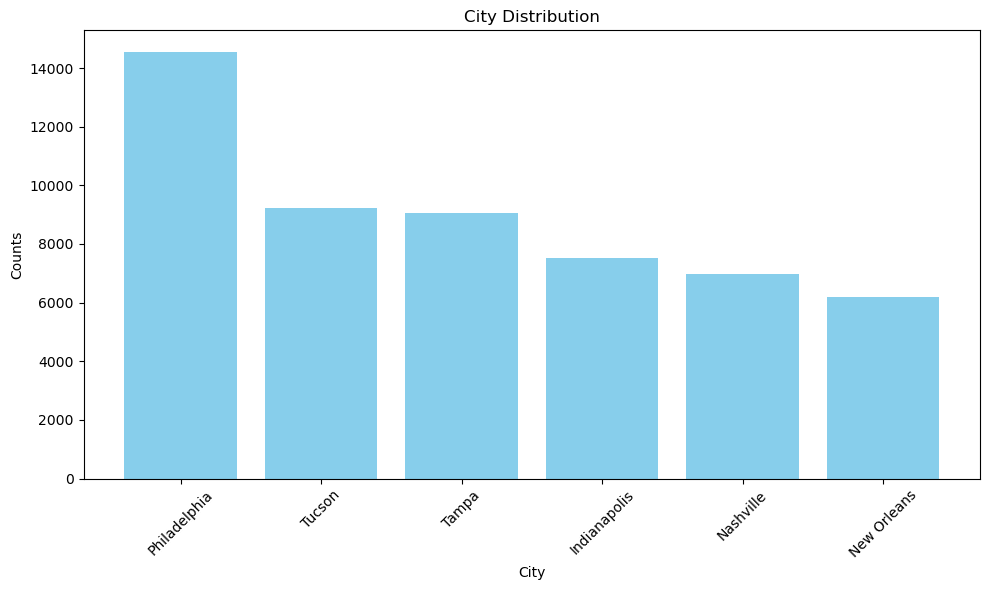

In [120]:
cities = ['Philadelphia', 'Tucson', 'Tampa', 'Indianapolis', 'Nashville', 'New Orleans']
values = [14560, 9244, 9042, 7537, 6969, 6208]

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(cities, values, color='skyblue')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
# plt.savefig('figures/BusinessCitiesChart.png', bbox_inches='tight')
# Show the plot
plt.show()

### Categories

I want to save each of these main categories to their own data frame. This will make the data easier to work with and segment my process working with one category at a time. 

In [37]:
# Saving seperated data to there own data frames

restaurants_df = filtered_df_b[filtered_df_b['categories'].str.contains('Restaurants')].reset_index(drop=True)
food_df = filtered_df_b[filtered_df_b['categories'].str.contains(', Food,')].reset_index(drop=True)
active_life_df = filtered_df_b[filtered_df_b['categories'].str.contains('Active Life')].reset_index(drop=True)
arts_entertainment_df = filtered_df_b[filtered_df_b['categories'].str.contains('Arts & Entertainment')].reset_index(drop=True)
hotels_travel_df = filtered_df_b[filtered_df_b['categories'].str.contains('Hotels & Travel')].reset_index(drop=True)
nightlife_df = filtered_df_b[filtered_df_b['categories'].str.contains('Nightlife')].reset_index(drop=True)

print(f'Restaurants: {restaurants_df.shape}\n\
Food: {food_df.shape}\n\
Active Life: {active_life_df.shape}\n\
Arts & Entertainment: {arts_entertainment_df.shape}\n\
Hotels & Travel: {hotels_travel_df.shape}\n\
Nightlife: {nightlife_df.shape}')

Restaurants: (18901, 14)
Food: (5415, 14)
Active Life: (2563, 14)
Arts & Entertainment: (2440, 14)
Hotels & Travel: (2546, 14)
Nightlife: (5242, 14)


##### Acceptable Categories

In [38]:
restaurants_categories = [
    "Restaurants", "Afghan", "African", "Senegalese", "South African", "American (New)", "American (Traditional)", "Andalusian", "Arabian", 
    "Arab Pizza", "Argentine", "Armenian", "Asian Fusion", "Asturian", "Australian", "Austrian", "Baguettes", "Bangladeshi", "Barbeque", "Basque", "Bavarian", "Beer Garden", "Beer Hall", "Beisl", "Belgian", 
    "Flemish", "Bistros", "Black Sea", "Brasseries", "Brazilian", "Brazilian Empanadas", "Central Brazilian", "Northeastern Brazilian", 
    "Northern Brazilian", "Rodizios", "Breakfast & Brunch", "Pancakes", "British", "Buffets", "Bulgarian", "Burgers", "Burmese", "Cafes", 
    "Themed Cafes", "Cafeteria", "Cajun/Creole", "Cambodian", "Canadian (New)", "Canteen", "Caribbean", "Dominican", "Haitian", "Puerto Rican", 
    "Trinidadian", "Catalan", "Cheesesteaks", "Chicken Shop", "Chicken Wings",  "Chilean", "Chinese", "Cantonese", "Congee", "Dim Sum", "Fuzhou", 
    "Hainan", "Hakka", "Henghwa", "Hokkien", "Hunan", "Pekinese", "Shanghainese", "Szechuan", "Teochew", "Comfort Food", "Corsican", 
    "Creperies", "Cuban", "Curry Sausage", "Cypriot", "Czech", "Czech/Slovakian", "Danish", "Delis", "Diners", "Dinner Theater", "Dumplings", 
    "Eastern European", "Eritrean", "Ethiopian", "Fast Food", "Filipino", "Fischbroetchen", "Fish & Chips", "Flatbread", "Fondue", "Food Court", 
    "Food Stands", "Freiduria", "French", "Alsatian", "Auvergnat", "Berrichon", "Bourguignon", "Mauritius", "Nicoise", "Provencal", "Reunion", "French Southwest", 
    "Galician", "Game Meat", "Gastropubs", "Georgian", "German", "Baden", "Eastern German", "Franconian", "Hessian", "Northern German", "Palatine", 
    "Rhinelandian", "Giblets", "Gluten-Free", "Greek", "Guamanian", "Halal", "Hawaiian", "Heuriger", "Himalayan/Nepalese", "Honduran", "Hong Kong Style Cafe", 
    "Hot Dogs", "Hot Pot", "Hungarian", "Iberian", "Indian", "Indonesian", "International", "Irish", "Island Pub", "Israeli", "Italian", "Abruzzese", 
    "Altoatesine", "Apulian", "Calabrian", "Cucina Campana", "Emilian", "Friulan", "Ligurian", "Lumbard", "Napoletana", "Piemonte", "Roman", "Sardinian", 
    "Sicilian", "Tuscan", "Venetian", "Japanese", "Blowfish", "Conveyor Belt Sushi", "Donburi", "Gyudon", "Oyakodon", "Hand Rolls", "Horumon", "Izakaya", 
    "Japanese Curry", "Kaiseki", "Kushikatsu", "Oden", "Okinawan", "Okonomiyaki", "Onigiri", "Ramen", "Robatayaki", "Soba", "Sukiyaki", "Takoyaki", 
    "Tempura", "Teppanyaki", "Tonkatsu", "Udon", "Unagi", "Western Style Japanese Food", "Yakiniku", "Yakitori", "Jewish", "Kebab", "Kopitiam", "Korean", "Kosher", 
    "Kurdish", "Laos", "Laotian","Latin American","Colombian","Salvadoran","Venezuelan","Live/Raw Food","Lyonnais","Malaysian","Mamak","Nyonya","Meatballs",
    "Mediterranean","Falafel","Mexican","Eastern Mexican","Jaliscan","Northern Mexican","Oaxacan","Pueblan","Tacos","Tamales","Yucatan","Middle Eastern",
    "Egyptian","Lebanese","Milk Bars","Modern Australian","Modern European","Mongolian","Moroccan","New Mexican Cuisine","New Zealand","Nicaraguan",
    "Night Food","Nikkei","Noodles","Norcinerie","Open Sandwiches","Oriental","Pakistani","Pan Asian","Parent Cafes","Parma","Persian/Iranian","Peruvian",
    "PF/Comercial","Pita","Pizza","Polish","Pierogis","Polynesian","Pop-Up Restaurants","Portuguese","Alentejo","Algarve","Azores","Beira","Fado Houses","Madeira",
    "Minho","Ribatejo","Tras-os-Montes","Potatoes","Poutineries","Pub Food","Rice","Romanian","Rotisserie Chicken","Russian","Salad","Sandwiches","Scandinavian",
    "Schnitzel","Scottish","Seafood","Serbo Croatian","Signature Cuisine","Singaporean","Slovakian","Somali","Soul Food","Soup","Southern","Spanish","Arroceria/Paella",
    "Sri Lankan","Steakhouses","Supper Clubs","Sushi Bars","Swabian","Swedish","Swiss Food","Syrian","Tabernas","Taiwanese","Tapas Bars","Tapas/Small Plates","Tavola Calda",
    "Tex-Mex","Thai","Traditional Norwegian","Traditional Swedish","Trattorie","Turkish","Chee Kufta","Gozleme","Homemade Food","Lahmacun","Ottoman Cuisine",
    "Turkish Ravioli","Ukrainian","Uzbek","Vegan","Vegetarian","Venison","Vietnamese","Waffles","Wok","Wraps","Yugoslav"
]


In [39]:
al_categories = [
    "Active Life",
    "Amusement Parks",
    "Aquariums",
    "Archery",
    "ATV Rentals/Tours",
    "Axe Throwing",
    "Bathing Area",
    "Beach Equipment Rentals",
    "Beach Volleyball",
    "Beaches",
    "Bicycle Paths",
    "Bike Parking",
    "Bike Rentals",
    "Boating",
    "Bungee Jumping",
    "Canyoneering",
    "Carousels",
    "Climbing",
    "Scuba Diving",
    "Escape Games",
    "Experiences",
    "Yoga",
    "Flyboarding",
    "Gliding",
    "Go Karts",
    "Golf",
    "Hang Gliding",
    "Hiking",
    "Horse Racing",
    "Horseback Riding",
    "Hot Air Balloons",
    "Jet Skis",
    "Kids Activities",
    "Kiteboarding",
    "Lakes",
    "Mini Golf",
    "Mountain Biking",
    "Paddleboarding",
    "Paragliding",
    "Parasailing",
    "Parks",
    "Dog Parks",
    "Skate Parks",
    "Public Plazas",
    "Racing Experience",
    "Rafting/Kayaking",
    "Recreation Centers",
    "Rock Climbing",
    "Sailing",
    "Scavenger Hunts",
    "Scooter Rentals",
    "Skating Rinks",
    "Skiing",
    "Skydiving",
    "Sledding",
    "Snorkeling",
    "Surfing",
    "Swimming Pools",
    "Trampoline Parks",
    "Tubing",
    "Water Parks",
    "Ziplining",
    "Zoos",
    "Petting Zoos"
]

In [40]:
ae_categories = ['Arts & Entertainment', 'Arcades', 'Art Galleries', 'Botanical Gardens', 'Casinos', 'Cinema', 'Drive-In Theater', 'Outdoor Movies', 'Country Clubs', 
 'Cultural Center', 'Entertainment', 'Farms', 'Attraction Farms', 'Festivals', 'Haunted Houses', 'Jazz & Blues', 'LAN Centers', 'Museums', 'Art Museums', 
 'Children’s Museums', 'Music Venues', 'Observatories', 'Opera & Ballet', 'Paint & Sip', 'Performing Arts', 'Planetarium', 'Professional Sports Teams', 
 'Race Tracks', 'Rodeo', 'Social Clubs', 'Stadiums & Arenas', 'Studio Taping', 'Virtual Reality Centers', 'Wineries', 'Wine Tasting Room']

In [41]:
accommodations_categories = [
    "Bed & Breakfast",
    "Campgrounds",
    "Guest Houses",
    "Health Retreats",
    "Hostels",
    "Hotels",
    "Mountain Huts",
    "Residences",
    "RV Parks",
    "Resorts",
    "Ski Resorts",
    "Vacation Rentals"
]

In [42]:
tour_categories =['Tours',
 'Aerial Tours',
 'Architectural Tours',
 'Art Tours',
 'Beer Tours',
 'Bike Tours',
 'Boat Tours',
 'Bus Tours',
 'Food Tours',
 'Historical Tours',
 'Scooter Tours',
 'Walking Tours',
 'Whale Watching Tours',
 'Wine Tours']


In [43]:
nightlife_categories = ['Nightlife',
 'Adult Entertainment',
 'Strip Clubs',
 'Striptease Dancers',
 'Bar Crawl',
 'Bars',
 'Beer Bar',
 'Champagne Bars',
 'Cigar Bars',
 'Cocktail Bars',
 'Dive Bars',
 'Drive-Thru Bars',
 'Gay Bars',
 'Hookah Bars',
 'Irish Pub',
 'Lounges',
 'Pubs',
 'Speakeasies',
 'Sports Bars',
 'Tiki Bars',
 'Vermouth Bars',
 'Whiskey Bars',
 'Wine Bars',
 'Beer Gardens',
 'Club Crawl',
 'Comedy Clubs',
 'Country Dance Halls',
 'Dance Clubs',
 'Jazz & Blues',
 'Karaoke',
 'Music Venues',
 'Piano Bars',
 'Pool Halls']

##### Removing unwanted subcategories and mislabled businesses

In [44]:
# Function that checks subcategories.
def has_only_acceptable_categories(subcategories_list, acceptable_set):
    # Make sure that the subcategories are a list (if the entry is not NaN or similar).
    if isinstance(subcategories_list, list):
        return all(subcategory in acceptable_set for subcategory in subcategories_list)
    else:
        return True

In [45]:
restaurants_df['categories'] = restaurants_df['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
restaurants_df = restaurants_df[restaurants_df['categories'].apply(lambda x: has_only_acceptable_categories(x, restaurants_categories))]
restaurants_df.shape
# Now 'restaurants_df' should only contain businesses with acceptable subcategories.

(9578, 14)

In [46]:
active_life_df['categories'] = active_life_df['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
active_life_df = active_life_df[active_life_df['categories'].apply(lambda x: has_only_acceptable_categories(x, al_categories))]
active_life_df.shape
# Now 'active_life_df' should only contain businesses with acceptable subcategories.

(344, 14)

In [47]:
arts_entertainment_df['categories'] = arts_entertainment_df['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
arts_entertainment_df = arts_entertainment_df[arts_entertainment_df['categories'].apply(lambda x: has_only_acceptable_categories(x, ae_categories))]
arts_entertainment_df.shape
# Now 'arts_entertainment_df' should only contain businesses with acceptable subcategories.

(303, 14)

In [99]:
# For the tours category I have to treat a little different, Tour businesses often include subcategories outside the Hotel & Travel category

In [48]:
tours_df = hotels_travel_df[hotels_travel_df['categories'].str.contains('Tours')].reset_index(drop=True)
tours_df.shape
# Now 'tours_df' should only contain businesses with acceptable subcategories.

(458, 14)

In [49]:
nightlife_df['categories'] = nightlife_df['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
nightlife_df = nightlife_df[nightlife_df['categories'].apply(lambda x: has_only_acceptable_categories(x, nightlife_categories))]
nightlife_df.shape
# Now 'nightlife_df' should only contain businesses with acceptable subcategories.

(787, 14)

##### Exporting Data

In [50]:
# Exporting the data frames to a csv
# restaurants_df.to_csv('data/categories/restaurants.csv', index=False)
# food_df.to_csv('data/categories/food.csv')
# active_life_df.to_csv('data/categories/active_life.csv')
# arts_entertainment_df.to_csv('data/categories/arts_entertainment.csv')
# hotels_travel_df.to_csv('data/categories/hotels_travel.csv')
# nightlife_df.to_csv('data/categories/nightlife.csv')

### Resaurants
- [ ] Identify Sub Categories
    - [ ] Counts
    - [ ] Remove Irrelevant Categories
- [ ] Reduce Business df Rows
    - [ ] Businesses > 10 Reviews
- [ ] Filter Review df based on the filtered businesses and save to new df
- [ ] Reduce Review df Rows
    - [ ] Group df by user value counts
    - [ ] Users > 10 Reviews
- [ ] Export to CSV

Starting with restaurants we'll take a look at the restaurant df we created earlier. 

In [2]:
# restaurants_df = pd.read_csv('data/categories/restaurants.csv')

In [51]:
restaurants_df.shape

(9578, 14)

To reduce dimmensionality it would be good to only include resturants who have at least 10 reviews. Any less and the resturant might be brand new and probably shouldn't be included in our reccomondations. 

In [52]:
# Filtering the DataFrame to include only restaurants with at least 10 reviews
restaurants_df = restaurants_df[restaurants_df['review_count'] >= 10]
restaurants_df.shape

(7948, 14)

In [53]:
restaurants_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","[American (Traditional), Restaurants, Diners, ...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","[Sushi Bars, Restaurants, Japanese]","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
4,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","[Korean, Restaurants]","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
5,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","[Steakhouses, Asian Fusion, Restaurants]","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
7,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","[Restaurants, Japanese, Seafood]","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."


I'll filter our existing review table by our filtered restaurant df and include only the resturants we want for our model.

In [57]:
restaurant_ratings_df = df_r[df_r.business_id.isin(restaurants_df.business_id )]

In [58]:
restaurant_ratings_df.shape

(941991, 8)

To reduce dimensionality of our new df I want to indclude user that have at least 10 reviews. Mainly to exlcude users who are not regular users of the platform and there for would not benifit from our reccomondations and could influence others predicted ratings. 

In [59]:
# filter resturant review data by users with more than 10 reviews
u = restaurant_ratings_df.user_id.value_counts()
restaurant_ratings_df = restaurant_ratings_df[restaurant_ratings_df.user_id.isin(u.index[u.gt(10)])]
restaurant_ratings_df.shape

(225804, 8)

I'll remove the columns that are unneccesary for our model and sort features by users and then by businesses

In [60]:
restaurant_ratings_df = restaurant_ratings_df.sort_values(by=['user_id', 'business_id']).drop(columns=['funny', 'useful', 'cool', 'date']).set_index('review_id')
restaurant_ratings_df.head()

,user_id,business_id,stars
review_id,,,
299F0EMdtWuk1GlMfjJeIg,--u09WAjW741FdfkJXxNmg,03dIEDBsDERr6Osmey-udQ,3.0
hiDGNjV40s9lh6OR4BSNLA,--u09WAjW741FdfkJXxNmg,3OGzmGqWwsyGLkhnxrA9Pw,5.0
lkjHhNLsvr2CUGJs1SYd-Q,--u09WAjW741FdfkJXxNmg,ALK-7tTvDKAzxAtIiNyh2A,5.0
XemDCvJ4Hi9nHlb9jzJcLg,--u09WAjW741FdfkJXxNmg,GMezqeTkp3_nOfcDiEKQeg,3.0
I73K0_R6pSwuGb_IRba0Bg,--u09WAjW741FdfkJXxNmg,HEf0QXnhxrcIWxRfAbQ2iA,5.0


Our data is now ready for modelling

In [61]:
# export preparred data 
restaurant_ratings_df.to_csv('data/categories/restaurant_ratings.csv')

# Modeling 
I will most likley move this section to its own notebook

In [76]:
from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD
from surprise import accuracy
from surprise.model_selection import train_test_split
import pickle

In [ ]:
# restaurant_ratings_df = pd.read_csv('data/categories/restaurant_ratings.csv')

Training, testing and evaluating my model

In [84]:
%%time
# Loading sample data frame into a surprise data table
data = Dataset.load_from_df(restaurant_ratings_df, Reader(rating_scale=(1, 5)))
data
# Setting our train test ratio to 50-50
trainset, testset = train_test_split(data, test_size=0.5, random_state=25)

# We'll use the famous FunkSVD algorithm.
algo = FunkSVD(random_state=25)

# Train the algorithm on the trainset
algo.fit(trainset)

#Predict ratings for the testset
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0359
CPU times: user 1.69 s, sys: 314 ms, total: 2 s
Wall time: 2.4 s


1.035858358539872

With a baseline RMSE score of 1.0359 I can now try to improve the accuracy of my models parameters by adjusting varies parameters 

### Latent Factors
I want to visualize what effect the number of latent factors has on the RMSE score. The default number of latent factors for our model is 100.
The number of latent factors in the SVD can be critical. If you have too few, the model may not capture all the nuances of the data. If you have too many, it might overfit.

In [127]:
%%time 
# Printing how long this cell ran

# Setting our train test ratio to 50-50
trainset, testset = train_test_split(data, test_size=0.5, random_state=25)

rmse_scores = []
factors = range(10, 201, 5)
for n_factors in factors:
    my_algorithm = FunkSVD(n_factors = n_factors,
                           random_state=25,
                           verbose = False)
    
    my_algorithm.fit(trainset)
    my_predictions = my_algorithm.test(testset)
    
    RMSE = accuracy.rmse(my_predictions, verbose = False) 
    rmse_scores.append(RMSE)
    print(n_factors, end="\r")

CPU times: user 58.1 s, sys: 537 ms, total: 58.6 s
Wall time: 59.2 s


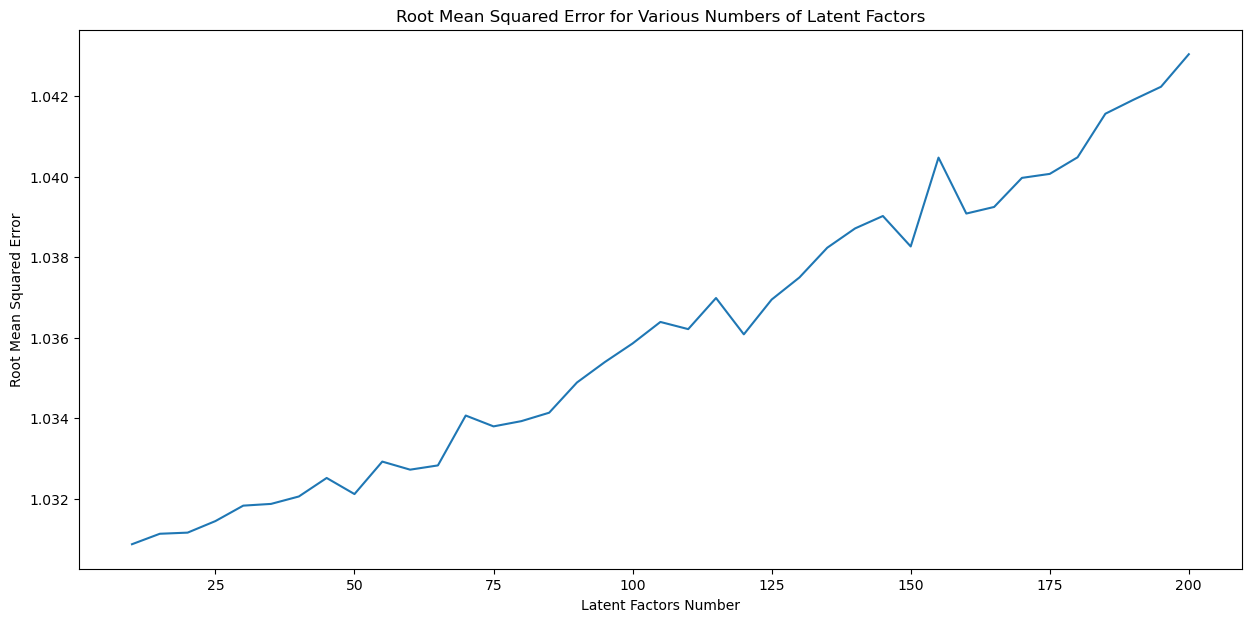

In [129]:
plt.figure(figsize=(15, 7))
plt.plot(factors, rmse_scores)
plt.xlabel("Latent Factors Number")
plt.ylabel("Root Mean Squared Error")
plt.title("Root Mean Squared Error for Various Numbers of Latent Factors")

# Save as PNG
# plt.savefig('figures/RMSE-LatentFactors.png', bbox_inches='tight')

plt.show()

After running the model with a different number of latent factors it looks like increaseing the number of factors leads to overfitting. Which happens when the model starts to learn not only the underlying patterns in the training data but also the noise. As a result, it performs well on the training data but poorly on the test data. It appears to perform better with a lower number of latent factors. 

### Learning Rate
I also want to quickly visualize what effect the learning rate has on the RMSE score. The default learning rate for all parameters is 0.005.
The learning rate is the rate at which the algorithm updates the latent features during each iteration. A lower learning rate might take longer to converge but can sometimes find a better minimum.

In [124]:
%%time 
# Printing how long this cell ran

# Setting our train test ratio to 50-50
trainset, testset = train_test_split(data, test_size=0.5, random_state=25)

rmse_scores = []
learning_rates = np.logspace(-4, -1, num=10)
for lr in learning_rates:
    my_algorithm = FunkSVD(lr_all = lr,
                           random_state=25,
                           verbose = False)
    
    my_algorithm.fit(trainset)
    my_predictions = my_algorithm.test(testset)
    
    RMSE = accuracy.rmse(my_predictions, verbose = False) 
    rmse_scores.append(RMSE)
    print(lr, end="\r")

CPU times: user 15.2 s, sys: 360 ms, total: 15.5 s
Wall time: 15.9 s


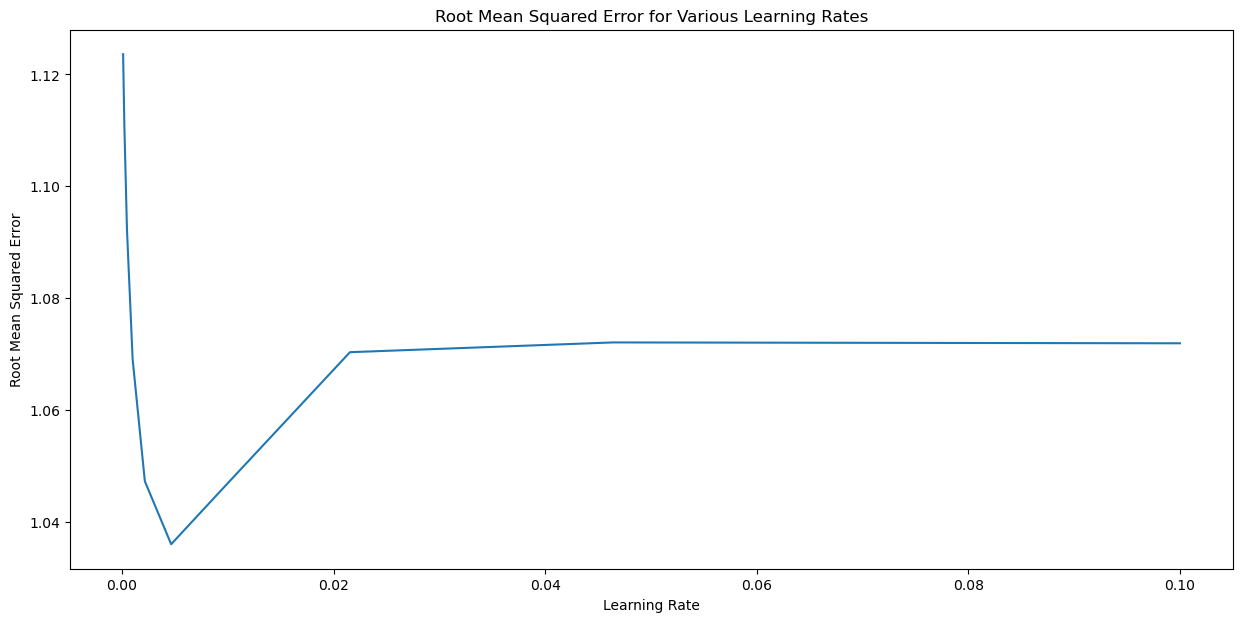

In [125]:
plt.figure(figsize=(15, 7))
plt.plot(learning_rates, rmse_scores)
plt.xlabel("Learning Rate")
plt.ylabel("Root Mean Squared Error")
plt.title("Root Mean Squared Error for Various Learning Rates")

# Save as PNG
plt.savefig('figures/RMSE-LearningRate.png', bbox_inches='tight')
plt.show()

The chart shows how varying the learning rate impacts the RMSE of the model. The RMSE is initially very high, which suggests that the model isn’t learning enough each step to make significant progress towards minimizing the error. The RMSE then drops sharply, indicating that the model is starting to learn better and is making good progress in finding a lower error.

Needed to reduce the size of my data to generate predicted ratings for all user/business pairs that don't have an existing rating

In [69]:
sample = restaurant_ratings_df.sample(frac=0.1,random_state=42)

In [70]:
%%time
# Load the dataset from the dataframe
data = Dataset.load_from_df(sample, Reader(rating_scale=(1, 5)))

# Split the dataset into training and test set
trainset = data.build_full_trainset()

# Use the FunkSVD algorithm
algo = FunkSVD(random_state=25)
algo.fit(trainset)

# Now we need to predict ratings for all combinations of users and items that are NOT in the training set
testset = trainset.build_anti_testset()

# Predicting the ratings for the testset
predictions = algo.test(testset)

CPU times: user 1min 41s, sys: 36.8 s, total: 2min 18s
Wall time: 2min 39s


In [77]:
# Saving predictions algorithim to a file
with open('algorithims/s_predictions.pkl', 'wb') as f:
    pickle.dump(predictions, f)

In [71]:
# Converting predictions into a human readable format (pandas df)
%%time
# The predictions are a list of Prediction objects, which you can convert to a dataframe if needed
predicted_ratings = pd.DataFrame(predictions)

# You can then sort these predictions for each user or display them however you like
predicted_ratings.head()

CPU times: user 12.7 s, sys: 11.2 s, total: 23.8 s
Wall time: 28.3 s


,uid,iid,r_ui,est,details
0,tpeSrIFB-Ce0CjtTsRE0OA,pOPggEGV0gy8U0v-lHByRA,3.829141,3.959786,{'was_impossible': False}
1,tpeSrIFB-Ce0CjtTsRE0OA,w-DEeeCRDlKoyO2P7nTKdQ,3.829141,3.580084,{'was_impossible': False}
2,tpeSrIFB-Ce0CjtTsRE0OA,bmJgvpuf2GBXd62ELK0Q2w,3.829141,3.593905,{'was_impossible': False}
3,tpeSrIFB-Ce0CjtTsRE0OA,nyU4OrNGq-rme9lHvtIVIA,3.829141,3.799522,{'was_impossible': False}
4,tpeSrIFB-Ce0CjtTsRE0OA,OChSrnaj5tQ1-wm7zoVT4w,3.829141,4.081622,{'was_impossible': False}


In [72]:
predicted_ratings.shape

(43580576, 5)

In [73]:
predicted_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580576 entries, 0 to 43580575
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   uid      object 
 1   iid      object 
 2   r_ui     float64
 3   est      float64
 4   details  object 
dtypes: float64(2), object(3)
memory usage: 1.6+ GB


In [ ]:
# Load algorithim from a file
with open('/mnt/data/predictions.pkl', 'rb') as f:
    loaded_predictions = pickle.load(f)

### Food

### Nightlife

### Active Life

### Hotel & Travel

### Arts & Entertainment